# Import and load basic functions

In [1]:
import numpy as np              #numpy library is used to work with multidimensional array.
import pandas as pd             #panda used for data manipulation and analysis.

import matplotlib.pyplot as plt #support ploting a figure
from matplotlib import colors   #colors support converting number or argument into colors

import tensorflow as tf

In [2]:
from import_plot import *

In [3]:
task=get_task()

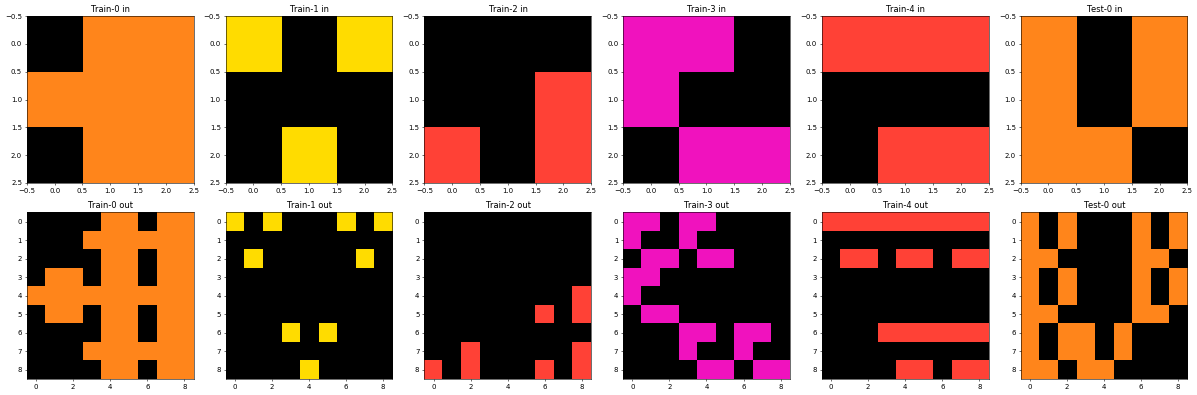

In [4]:
plot_task(task)

In [7]:
dimension_explained('train')
dimension_explained('eval')
dimension_explained('test')

------------ train  shapes ------------
t1 all inputs are equal:  210 of which: 
t1_1 also output equal:  134
t1_2 output smaller but fixed:  43
t1_3 output bigger but fixed:  19
t1_4 output size depends on input 14
t2 input different:  190 of which: 
t2_1 output equal to input:  128
t2_2 output smaller :  50
t2_3 output bigger :  12
------------ eval  shapes ------------
t1 all inputs are equal:  157 of which: 
t1_1 also output equal:  92
t1_2 output smaller but fixed:  32
t1_3 output bigger but fixed:  20
t1_4 output size depends on input 13
t2 input different:  243 of which: 
t2_1 output equal to input:  178
t2_2 output smaller :  51
t2_3 output bigger :  14
------------ test  shapes ------------
t1 all inputs are equal:  41 of which: 
t1_1 also output equal:  23
t1_2 output smaller but fixed:  8
t1_3 output bigger but fixed:  7
t1_4 output size depends on input 3
t2 input different:  59 of which: 
t2_1 output equal to input:  42
t2_2 output smaller :  15
t2_3 output bigger :  2


In [5]:
diz_train=check_dim('train')
diz_eval=check_dim('eval')
diz_test=check_dim('test')

In [30]:
def build_model(task):
    
    inp_dim=np.array(np.array(task['train'][0]['input']).shape)
    out_dim=np.array(np.array(task['train'][0]['output']).shape)
    
    images = tf.keras.layers.Input(shape=(inp_dim[0],inp_dim[1],10))
    conv = images
    conv=tf.keras.layers.Flatten()(images)
    #conv=tf.keras.layers.Dropout(rate=0.15)(conv)
    conv=tf.keras.layers.Dense(inp_dim[0]*inp_dim[1]*10)(conv)
    conv=tf.keras.layers.Dense(out_dim[0]*out_dim[1]*10)(conv)
    conv=tf.keras.layers.Reshape(target_shape=(out_dim[0], out_dim[1], 10))(conv)
    conv=tf.keras.layers.Dense(10)(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mse', 'accuracy'])
    return model

# Generators 

### Mirror right and down

#### examples

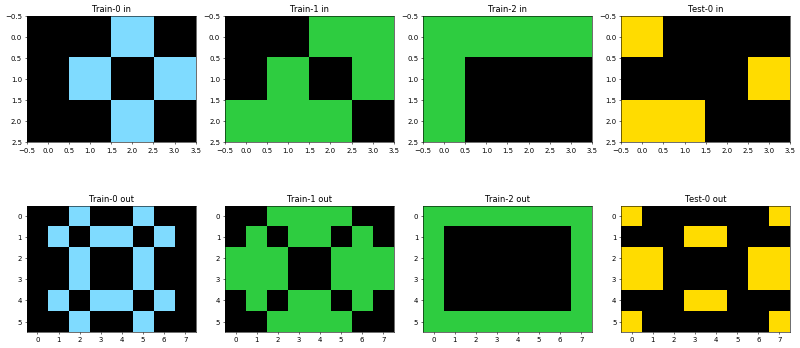

In [21]:
task=get_task(index=82)
plot_task(task)

In [22]:
task

{'test': [{'input': [[4, 0, 0, 0], [0, 0, 0, 4], [4, 4, 0, 0]],
   'output': [[4, 0, 0, 0, 0, 0, 0, 4],
    [0, 0, 0, 4, 4, 0, 0, 0],
    [4, 4, 0, 0, 0, 0, 4, 4],
    [4, 4, 0, 0, 0, 0, 4, 4],
    [0, 0, 0, 4, 4, 0, 0, 0],
    [4, 0, 0, 0, 0, 0, 0, 4]]}],
 'train': [{'input': [[0, 0, 8, 0], [0, 8, 0, 8], [0, 0, 8, 0]],
   'output': [[0, 0, 8, 0, 0, 8, 0, 0],
    [0, 8, 0, 8, 8, 0, 8, 0],
    [0, 0, 8, 0, 0, 8, 0, 0],
    [0, 0, 8, 0, 0, 8, 0, 0],
    [0, 8, 0, 8, 8, 0, 8, 0],
    [0, 0, 8, 0, 0, 8, 0, 0]]},
  {'input': [[0, 0, 3, 3], [0, 3, 0, 3], [3, 3, 3, 0]],
   'output': [[0, 0, 3, 3, 3, 3, 0, 0],
    [0, 3, 0, 3, 3, 0, 3, 0],
    [3, 3, 3, 0, 0, 3, 3, 3],
    [3, 3, 3, 0, 0, 3, 3, 3],
    [0, 3, 0, 3, 3, 0, 3, 0],
    [0, 0, 3, 3, 3, 3, 0, 0]]},
  {'input': [[3, 3, 3, 3], [3, 0, 0, 0], [3, 0, 0, 0]],
   'output': [[3, 3, 3, 3, 3, 3, 3, 3],
    [3, 0, 0, 0, 0, 0, 0, 3],
    [3, 0, 0, 0, 0, 0, 0, 3],
    [3, 0, 0, 0, 0, 0, 0, 3],
    [3, 0, 0, 0, 0, 0, 0, 3],
    [3, 3, 3, 3, 3, 3,

In [23]:
def gener_one():
    skeleton=np.random.randint(2,size=(3,4))
    color=np.random.randint(1, 10)
    inp=np.where(skeleton==0, 0, color)
    flip_right=np.concatenate((inp,np.flip(inp, axis=1)), axis=1)
    out=np.concatenate((flip_right,np.flip(flip_right, axis=0)), axis=0)
    return(inp, out)

In [24]:
def task_builder_one(n_train=1000, n_test=250):
    task={'train':[], 'test':[]}
    for i in range(0,n_train):
        inp, out=gener_one()
        task['train'].append({'input':inp, 'output':out})
    for i in range(0,n_test):
        inp, out=gener_one()
        task['test'].append({'input':inp, 'output':out})
    return task
    
    
    

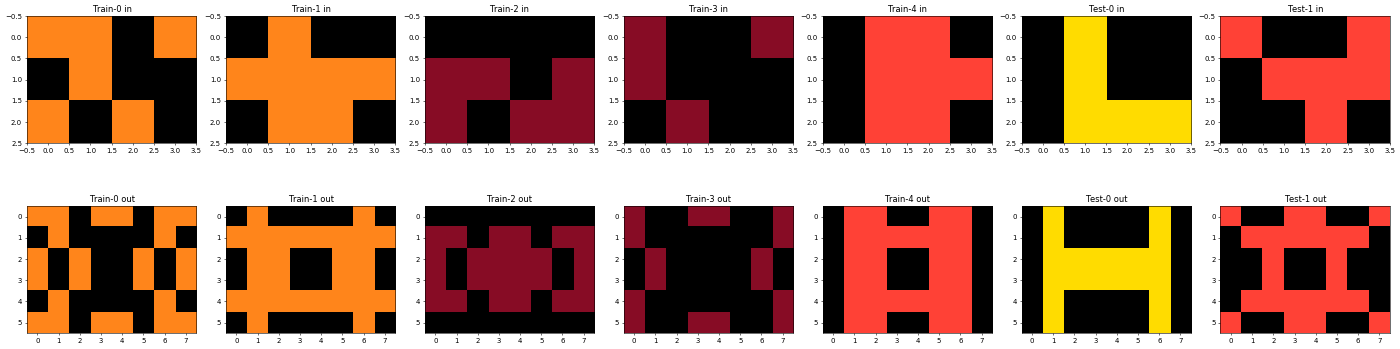

In [25]:
task=task_builder_one(5, 2)
plot_task(task)

In [26]:
task=task_builder_one(10000, 500)

In [27]:
data=[]
label=[]
for pair in task['train']:
    dat=tf.constant(pair['input'])
    lab=tf.constant(pair['output'])
    data.append(tf.one_hot(dat, 10))
    label.append(tf.one_hot(lab,10))
trainset = tf.data.Dataset.from_tensor_slices((data, label))

data=[]
label=[]

for pair in task['test']:
    dat=tf.constant(pair['input'])
    lab=tf.constant(pair['output'])
    data.append(tf.one_hot(dat, 10))
    label.append(tf.one_hot(lab,10))
valset = tf.data.Dataset.from_tensor_slices((data, label))

In [33]:
model=build_model(task)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3, 4, 10)]        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               14520     
_________________________________________________________________
dense_10 (Dense)             (None, 480)               58080     
_________________________________________________________________
reshape_3 (Reshape)          (None, 6, 8, 10)          0         
_________________________________________________________________
dense_11 (Dense)             (None, 6, 8, 10)          110       
_________________________________________________________________
softmax_3 (Softmax)          (None, 6, 8, 10)          0   

In [34]:
EPOCHS = 5

history = model.fit(trainset.batch(5),validation_data=valset.batch(5),  epochs=EPOCHS)

Train for 2000 steps, validate for 100 steps
Epoch 1/5
2000/2000 [==============================] - 9s 4ms/step - loss: 0.1479 - mse: 0.0061 - accuracy: 0.9599 - val_loss: 0.0021 - val_mse: 3.0097e-05 - val_accuracy: 1.0000
Epoch 2/5
2000/2000 [==============================] - 8s 4ms/step - loss: 8.4345e-04 - mse: 7.2886e-06 - accuracy: 1.0000 - val_loss: 6.2824e-04 - val_mse: 1.2257e-05 - val_accuracy: 1.0000
Epoch 3/5
2000/2000 [==============================] - 8s 4ms/step - loss: 2.3869e-04 - mse: 2.3774e-06 - accuracy: 1.0000 - val_loss: 3.0437e-04 - val_mse: 7.0031e-06 - val_accuracy: 1.0000
Epoch 4/5
2000/2000 [==============================] - 8s 4ms/step - loss: 9.2327e-05 - mse: 9.8610e-07 - accuracy: 1.0000 - val_loss: 1.7784e-04 - val_mse: 4.4951e-06 - val_accuracy: 1.0000
Epoch 5/5
2000/2000 [==============================] - 8s 4ms/step - loss: 2.9629e-05 - mse: 1.4274e-07 - accuracy: 1.0000 - val_loss: 9.7933e-05 - val_mse: 1.9325e-06 - val_accuracy: 1.0000


(0, 0.05)

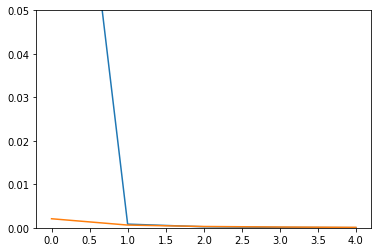

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0, 0.05)

### CONCATENATION AND FLIP CENTRAL ROW

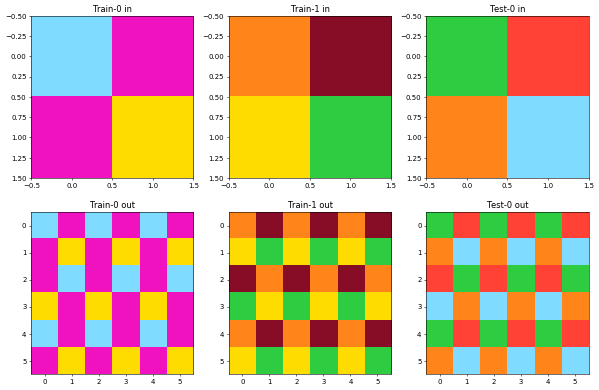

In [36]:
task=get_task('eval',0 )
plot_task(task)

In [37]:
def gener_two():
    inp=np.random.randint(1,10,size=(2,2))
    flip=np.flip(inp, axis=1)
    conc1=np.concatenate((inp, inp, inp), axis=1)
    conc2=np.concatenate((flip, flip, flip), axis=1)
    out=np.concatenate((conc1, conc2, conc1), axis=0)
    return(inp, out)

In [38]:
def task_builder_two(n_train=1000, n_test=250):
    task={'train':[], 'test':[]}
    for i in range(0,n_train):
        inp, out=gener_two()
        task['train'].append({'input':inp, 'output':out})
    for i in range(0,n_test):
        inp, out=gener_two()
        task['test'].append({'input':inp, 'output':out})
    return task

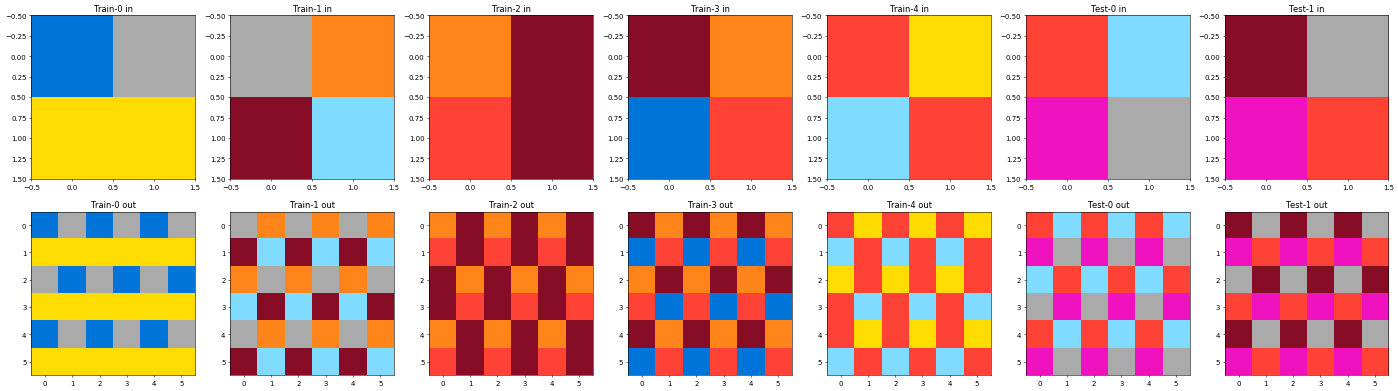

In [39]:
task_gen=task_builder_two(5, 2)
plot_task(task_gen)

In [40]:
task=task_builder_two(10000, 500)

In [41]:
model=build_model(task)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 2, 2, 10)]        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 40)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_13 (Dense)             (None, 360)               14760     
_________________________________________________________________
reshape_4 (Reshape)          (None, 6, 6, 10)          0         
_________________________________________________________________
dense_14 (Dense)             (None, 6, 6, 10)          110       
_________________________________________________________________
softmax_4 (Softmax)          (None, 6, 6, 10)          0   

In [42]:
data=[]
label=[]
for pair in task['train']:
    dat=tf.constant(pair['input'])
    lab=tf.constant(pair['output'])
    data.append(tf.one_hot(dat, 10))
    label.append(tf.one_hot(lab,10))
trainset = tf.data.Dataset.from_tensor_slices((data, label))

data=[]
label=[]

for pair in task['test']:
    dat=tf.constant(pair['input'])
    lab=tf.constant(pair['output'])
    data.append(tf.one_hot(dat, 10))
    label.append(tf.one_hot(lab,10))
valset = tf.data.Dataset.from_tensor_slices((data, label))

In [43]:
EPOCHS = 5

history = model.fit(trainset.batch(5),validation_data=valset.batch(5),  epochs=EPOCHS)

Train for 2000 steps, validate for 100 steps
Epoch 1/5
2000/2000 [==============================] - 9s 4ms/step - loss: 0.3016 - mse: 0.0121 - accuracy: 0.9422 - val_loss: 0.0025 - val_mse: 1.4504e-06 - val_accuracy: 1.0000
Epoch 2/5
2000/2000 [==============================] - 8s 4ms/step - loss: 9.9469e-04 - mse: 2.8243e-07 - accuracy: 1.0000 - val_loss: 3.7385e-04 - val_mse: 2.9608e-08 - val_accuracy: 1.0000
Epoch 3/5
2000/2000 [==============================] - 9s 4ms/step - loss: 1.9197e-04 - mse: 8.5566e-09 - accuracy: 1.0000 - val_loss: 9.5024e-05 - val_mse: 1.8090e-09 - val_accuracy: 1.0000
Epoch 4/5
2000/2000 [==============================] - 8s 4ms/step - loss: 5.2533e-05 - mse: 5.9091e-10 - accuracy: 1.0000 - val_loss: 2.8155e-05 - val_mse: 1.5233e-10 - val_accuracy: 1.0000
Epoch 5/5
2000/2000 [==============================] - 8s 4ms/step - loss: 1.6031e-05 - mse: 5.2384e-11 - accuracy: 1.0000 - val_loss: 8.8606e-06 - val_mse: 1.4592e-11 - val_accuracy: 1.0000


(0, 0.05)

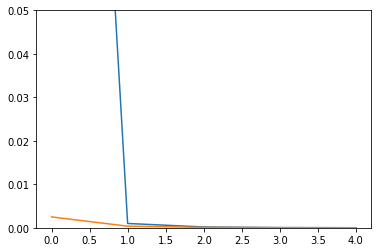

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0, 0.05)

### Pattern filler

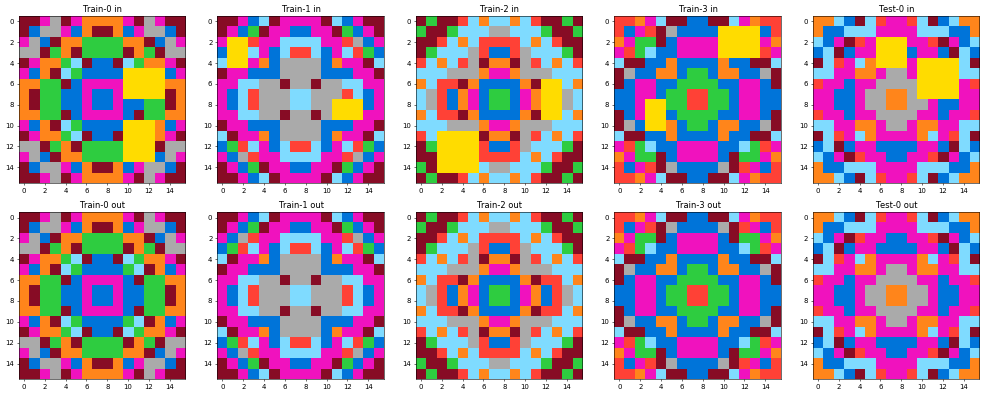

In [57]:
task=get_task('train', 286)
plot_task(task)

In [58]:
def gener_three():
    a = np.random.randint(2, 10, (8, 8))
    a = np.where(a==4, 1, a)
    m = np.tril(a) + np.tril(a, -1).T
    m = np.concatenate((m, np.flip(m, axis=0)), axis=0)
    out= np.concatenate((m, np.flip(m)), axis=1)
    inp = out.copy()

    p1=np.random.randint(1, 13)
    p2=np.random.randint(p1+2, p1+5)
    p3=np.random.randint(1, 13)
    p4=np.random.randint(p3+2, p3+5)

    inp[p1:p2, p3:p4]=4

    p1=np.random.randint(1, 13)
    p2=np.random.randint(p1+2, p1+5)
    p3=np.random.randint(1, 13)
    p4=np.random.randint(p3+2, p3+5)

    inp[p1:p2, p3:p4]=4 
    
    return(inp, out)

In [59]:
def task_builder_three(n_train=1000, n_test=250):
    task={'train':[], 'test':[]}
    for i in range(0,n_train):
        inp, out=gener_three()
        task['train'].append({'input':inp, 'output':out})
    for i in range(0,n_test):
        inp, out=gener_three()
        task['test'].append({'input':inp, 'output':out})
    return task

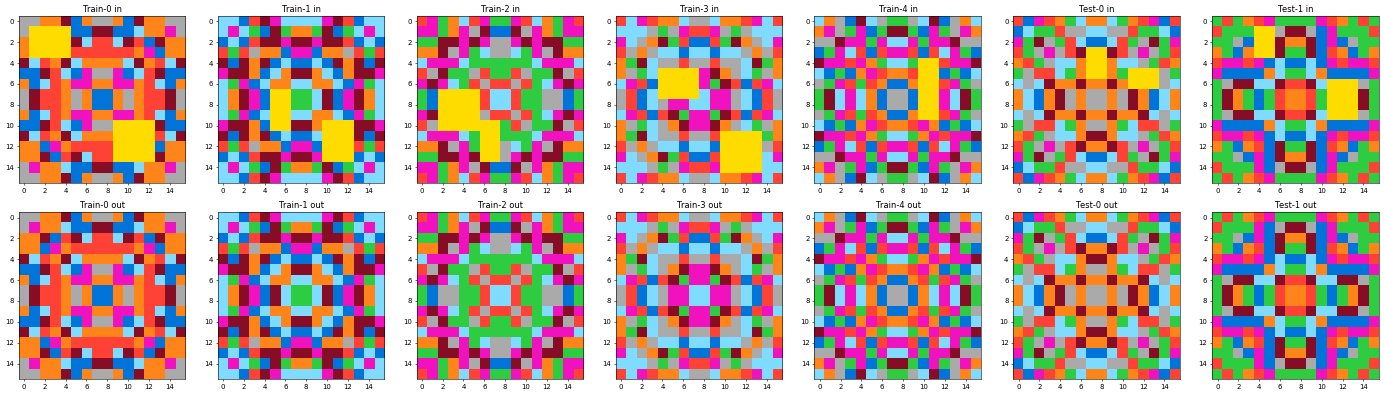

In [60]:
task=task_builder_three(5, 2)
plot_task(task)

In [61]:
task=task_builder_three(10000, 20)

In [62]:
data=[]
label=[]
for pair in task['train']:
    dat=tf.constant(pair['input'])
    lab=tf.constant(pair['output'])
    data.append(tf.one_hot(dat, 10))
    label.append(tf.one_hot(lab,10))
trainset = tf.data.Dataset.from_tensor_slices((data, label))

data=[]
label=[]

for pair in task['test']:
    dat=tf.constant(pair['input'])
    lab=tf.constant(pair['output'])
    data.append(tf.one_hot(dat, 10))
    label.append(tf.one_hot(lab,10))
valset = tf.data.Dataset.from_tensor_slices((data, label))

In [63]:
model=build_model(task)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 16, 16, 10)]      0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 2560)              6556160   
_________________________________________________________________
dense_16 (Dense)             (None, 2560)              6556160   
_________________________________________________________________
reshape_5 (Reshape)          (None, 16, 16, 10)        0         
_________________________________________________________________
dense_17 (Dense)             (None, 16, 16, 10)        110       
_________________________________________________________________
softmax_5 (Softmax)          (None, 16, 16, 10)        0   

In [64]:
EPOCHS = 5

history = model.fit(trainset.batch(5),validation_data=valset.batch(5),  epochs=EPOCHS)

Train for 2000 steps, validate for 4 steps
Epoch 1/5
2000/2000 [==============================] - 37s 18ms/step - loss: 0.2061 - mse: 0.0092 - accuracy: 0.9345 - val_loss: 0.0250 - val_mse: 9.3834e-04 - val_accuracy: 0.9941
Epoch 2/5
2000/2000 [==============================] - 36s 18ms/step - loss: 0.0318 - mse: 0.0011 - accuracy: 0.9930 - val_loss: 0.0337 - val_mse: 8.7789e-04 - val_accuracy: 0.9947
Epoch 3/5
2000/2000 [==============================] - 36s 18ms/step - loss: 0.0255 - mse: 9.7716e-04 - accuracy: 0.9938 - val_loss: 0.0207 - val_mse: 7.6435e-04 - val_accuracy: 0.9949
Epoch 4/5
2000/2000 [==============================] - 36s 18ms/step - loss: 0.0193 - mse: 6.9010e-04 - accuracy: 0.9956 - val_loss: 0.0165 - val_mse: 6.8609e-04 - val_accuracy: 0.9957
Epoch 5/5
2000/2000 [==============================] - 36s 18ms/step - loss: 0.0157 - mse: 6.0712e-04 - accuracy: 0.9961 - val_loss: 0.0298 - val_mse: 9.2276e-04 - val_accuracy: 0.9943


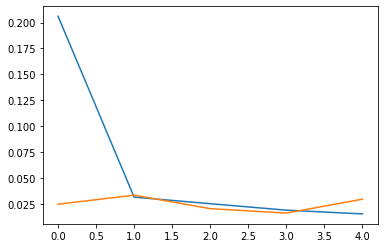

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


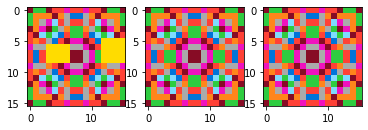

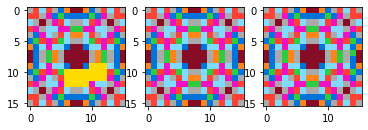

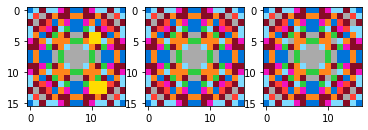

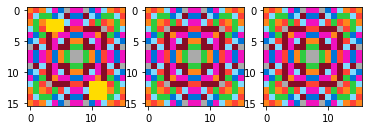

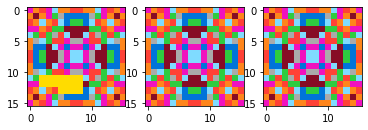

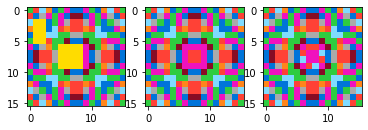

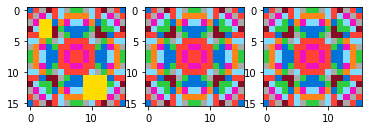

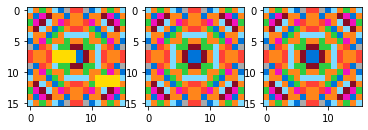

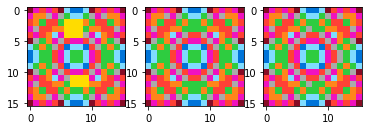

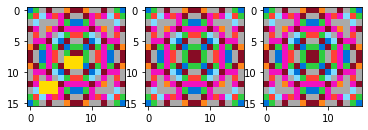

In [67]:
for xb, yb in trainset.batch(10).take(1):
    for i in range(0,10):
        x=tf.math.argmax(xb[i], axis=-1)
        true=tf.math.argmax(yb[i], axis=-1)
        pred=tf.math.argmax(model.predict(xb)[i], axis=-1)
        plt.subplot(1,3,1)
        plt.imshow(x, cmap=cmap, norm=norm)
        plt.subplot(1,3,2)
        plt.imshow(true, cmap=cmap, norm=norm)
        plt.subplot(1,3,3)
        plt.imshow(pred, cmap=cmap, norm=norm)
        plt.show()

### DIFFERENT DIMENSIONS: DENOISE

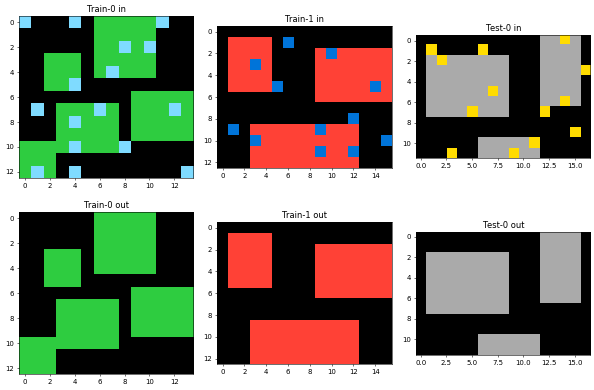

In [71]:
task=get_task('train', 191)
plot_task(task)

In [671]:
def gener_four():
    dim1=np.random.randint(10,15)
    dim2=np.random.randint(13,18)
    out=np.zeros((dim1,dim2))
    col=np.random.choice([2,3,5])
    colno=np.random.choice([1,4,8])
    nsquare=np.random.randint(3,5)
    nnoise=np.random.randint(10,20)
    for sq in range(0,nsquare):
        p1=np.random.randint(0, dim1-1)
        p2=np.random.randint(p1+2, p1+8)
        p3=np.random.randint(0, dim2-1)
        p4=np.random.randint(p3+2, p3+8)

        out[p1:p2, p3:p4]=col

    inp=out.copy()

    for noise in range(0,nnoise):
        p1=np.random.randint(0, dim1)
        p2=np.random.randint(0, dim2)

        out[p1,p2]=colno
    return(inp, out)

In [381]:
def task_builder_four(n_train=1000, n_test=250):
    task={'train':[], 'test':[]}
    for i in range(0,n_train):
        inp, out=gener_four()
        task['train'].append({'input':inp, 'output':out})
    for i in range(0,n_test):
        inp, out=gener_four()
        task['test'].append({'input':inp, 'output':out})
    return task

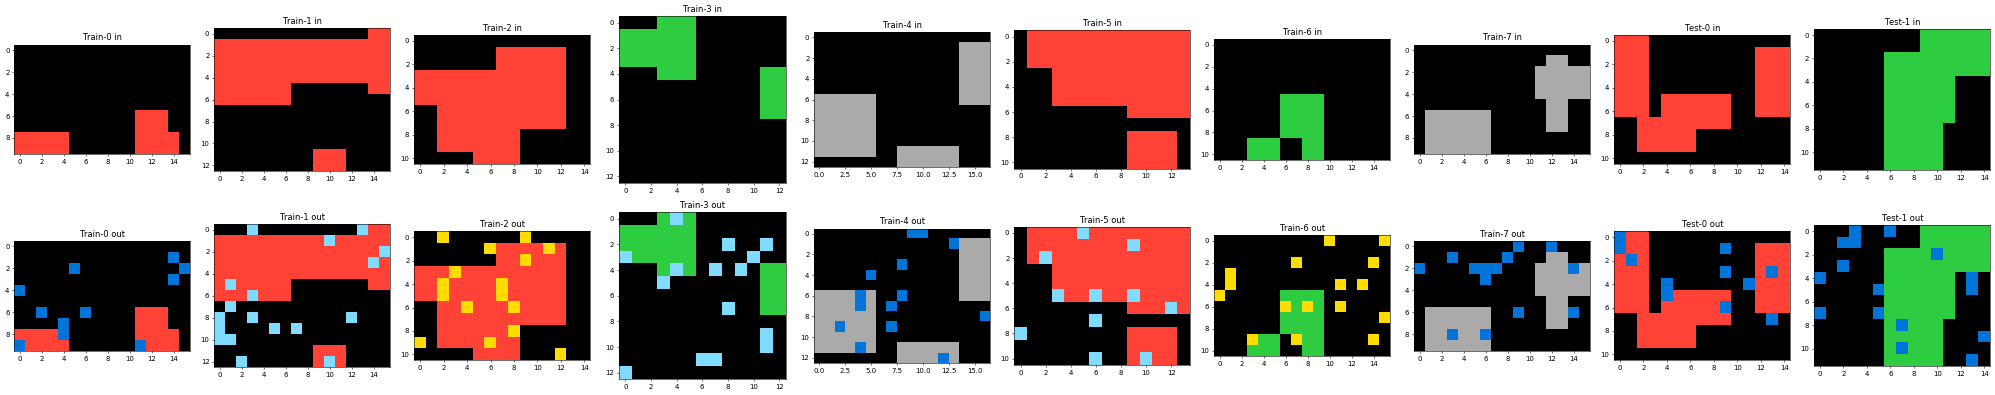

In [384]:
task=task_builder_four(8, 2)
plot_task(task)

### 2 quadrati

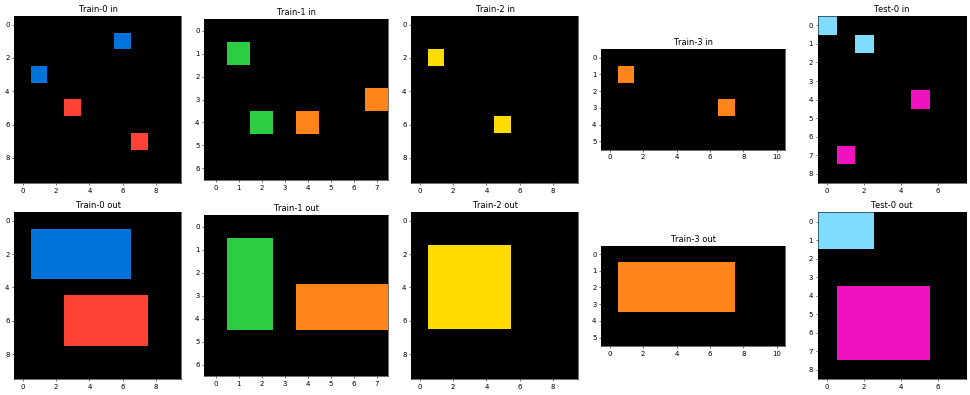

In [7]:
task=get_task('train', 131)
plot_task(task)

In [784]:
def gener_five():
    dim1=np.random.randint(5,11)
    dim2=np.random.randint(5,11)
    out=np.zeros((dim1,dim2))
    inp=out.copy()
    col=np.random.randint(1,10)
    col2=np.random.randint(1,10)
    nsquare=np.random.randint(1,3)
    
    flippoints=np.random.randint(1,3)
    
    while col2==col:
        col2=np.random.randint(1,10)

    if nsquare==1:
        p1=np.random.randint(0, dim1-2)
        p2=np.random.randint(p1+2,dim1)
        p3=np.random.randint(0, dim2-2)
        p4=np.random.randint(p3+2,dim2)

        out[p1:p2+1, p3:p4+1]=col
        inp[p1, p3]=col
        inp[p2, p4]=col
    if nsquare==2:
        if dim1>dim2:
            p1= np.random.randint(0, dim1-3)
            p2= np.random.randint(p1+1, dim1-2)
            p11= np.random.randint(p2+1, dim1-1)
            p22= np.random.randint(p11+1, dim1)
            p3= np.random.randint(0, dim2-3)
            p4= np.random.randint(p3+1, dim2)
            p33= np.random.randint(0, dim2-3)
            p44= np.random.randint(p33+1, dim2)

            out[p1:p2+1, p3:p4+1]=col            
            out[p11:p22+1, p33:p44+1]=col2
            
            if flippoints==1:
                inp[p1, p3]=col
                inp[p2, p4]=col            
                inp[p22, p33]=col2
                inp[p11, p44]=col2
            else:
                inp[p2, p3]=col
                inp[p1, p4]=col            
                inp[p11, p33]=col2
                inp[p22, p44]=col2
                
        else:
            p1= np.random.randint(0, dim1-3)
            p2= np.random.randint(p1+1, dim1)
            p11= np.random.randint(0, dim1-3)
            p22= np.random.randint(p11+1, dim1)
            p3= np.random.randint(0, dim2-3)
            p4= np.random.randint(p3+1, dim2-2)
            p33= np.random.randint(p4+1, dim2-1)
            p44= np.random.randint(p33+1, dim2)

            out[p1:p2+1, p3:p4+1]=col            
            out[p11:p22+1, p33:p44+1]=col2
            
            if flippoints==1:
                inp[p1, p3]=col
                inp[p2, p4]=col            
                inp[p22, p33]=col2
                inp[p11, p44]=col2
            else:
                inp[p2, p3]=col
                inp[p1, p4]=col            
                inp[p11, p33]=col2
                inp[p22, p44]=col2
    return(inp, out)

In [782]:
gener_five()

(array([[0., 0., 2., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 9., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 9., 0.],
        [0., 2., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 2., 2., 0., 0., 0., 0., 0., 0.],
        [0., 2., 2., 9., 9., 9., 9., 9., 0.],
        [0., 2., 2., 9., 9., 9., 9., 9., 0.],
        [0., 2., 2., 9., 9., 9., 9., 9., 0.],
        [0., 2., 2., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

In [785]:
def task_builder_five(n_train=1000, n_test=250):
    task={'train':[], 'test':[]}
    for i in range(0,n_train):
        inp, out=gener_five()
        task['train'].append({'input':inp, 'output':out})
    for i in range(0,n_test):
        inp, out=gener_five()
        task['test'].append({'input':inp, 'output':out})
    return task

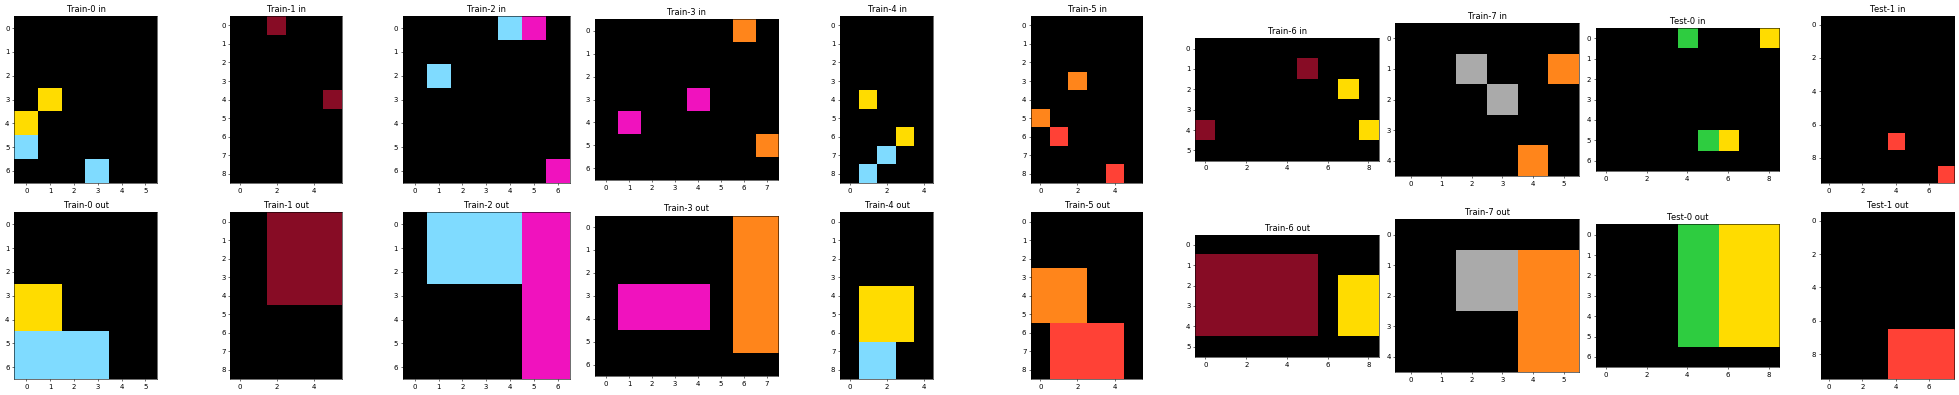

In [787]:
task=task_builder_five(8, 2)
plot_task(task)

### SMALLEST QUADRATO

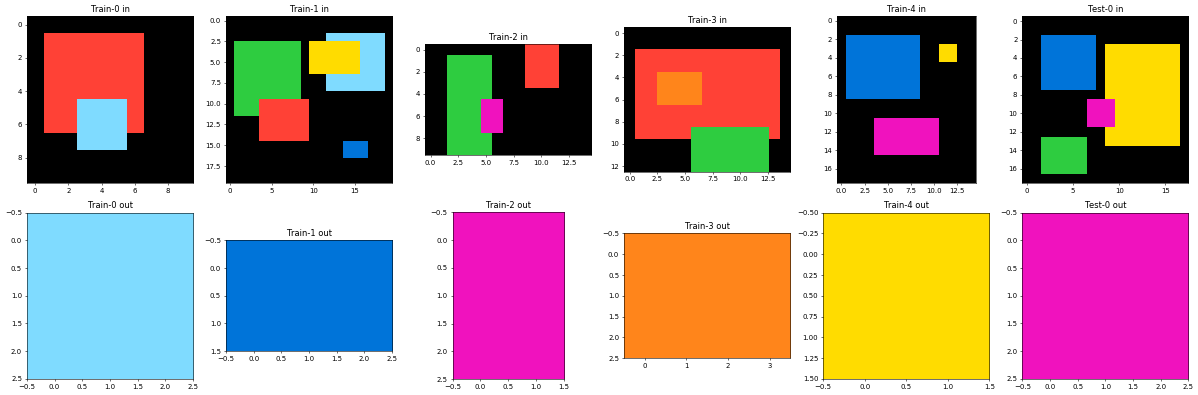

In [797]:
task=get_task('train', 48)
plot_task(task)

In [1078]:
def gener_six():
    dim1=np.random.randint(8,21)
    dim2=np.random.randint(8,21)
    inp=np.zeros((dim1,dim2))
    nsquare=np.random.randint(2,6)
    colors=np.random.choice(range(1,10),5, replace=False)
    sqs=[]
    for i in range(0, nsquare):
        p1=np.random.randint(1, dim1-3)
        p2=np.random.randint(p1+1,dim1-1)
        p3=np.random.randint(1, dim2-3)
        p4=np.random.randint(p3+1,dim2-1)
        sqs.append([((p2-p1)*(p4-p3)), p1,p2,p3,p4, colors[i]])
        
    sortt=sorted(sqs, reverse=True)
    for sq in sortt:
        _,p1,p2,p3,p4,col=sq
        inp[p1:p2+1, p3:p4+1]=col
    _,p1,p2,p3,p4,col=sortt[-1]
    
    out=np.ones((p2-p1,p4-p3))*col
    
    
    return(inp, out)

In [1079]:
def task_builder_six(n_train=1000, n_test=250):
    task={'train':[], 'test':[]}
    for i in range(0,n_train):
        inp, out=gener_six()
        task['train'].append({'input':inp, 'output':out})
    for i in range(0,n_test):
        inp, out=gener_six()
        task['test'].append({'input':inp, 'output':out})
    return task

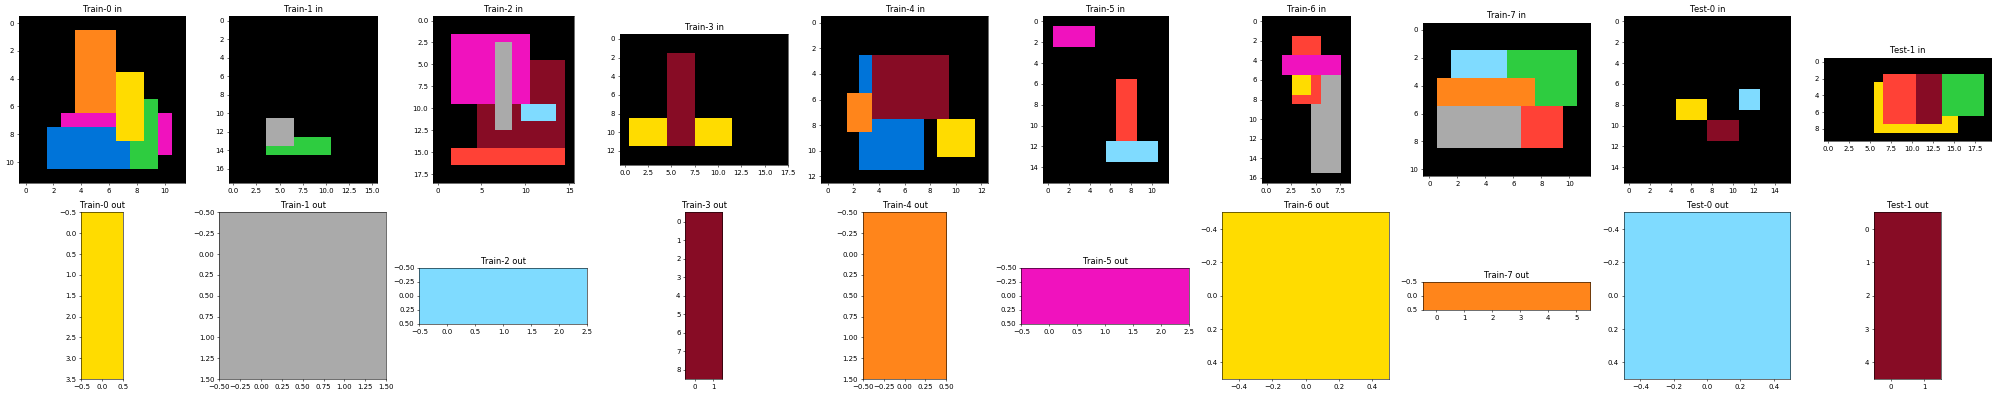

In [1080]:
task=task_builder_six(8, 2)
plot_task(task)

### NCASINO

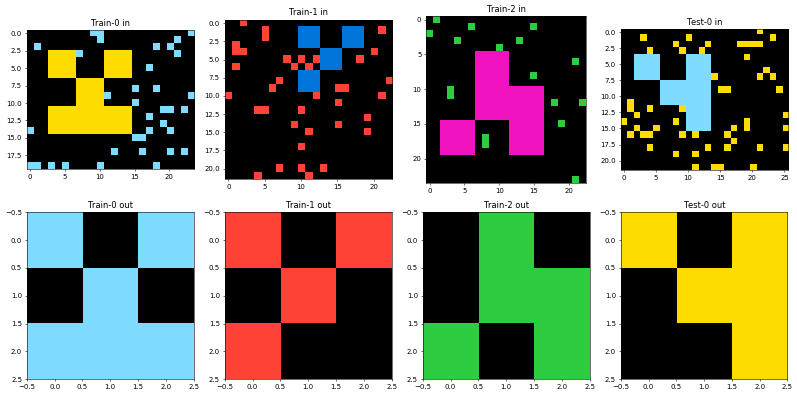

In [1081]:
task=get_task('train', 133)
plot_task(task)

In [1116]:
def gener_seven():
    dim1=np.random.randint(18,26)
    dim2=np.random.randint(18,26)
    colors=np.random.choice(range(1,10),2, replace=False)
    inp=np.zeros((dim1,dim2))
    
    nnoise=np.random.randint(15,50)
    for noise in range(0,nnoise):
        p1=np.random.randint(0, dim1)
        p2=np.random.randint(0, dim2)

        inp[p1,p2]=colors[0]
        
    
    
    skel=np.random.randint(2,size=(3,3))
    out=skel*colors[0]
    topaste=np.kron(skel, np.ones((4,4)))*colors[1]
    
    p1=np.random.randint(0, dim1-12)
    p2=np.random.randint(0,dim2-12)
    
    inp[p1:p1+12, p2:p2+12]=topaste
    
    return(inp, out)

In [1117]:
def task_builder_seven(n_train=1000, n_test=250):
    task={'train':[], 'test':[]}
    for i in range(0,n_train):
        inp, out=gener_seven()
        task['train'].append({'input':inp, 'output':out})
    for i in range(0,n_test):
        inp, out=gener_seven()
        task['test'].append({'input':inp, 'output':out})
    return task

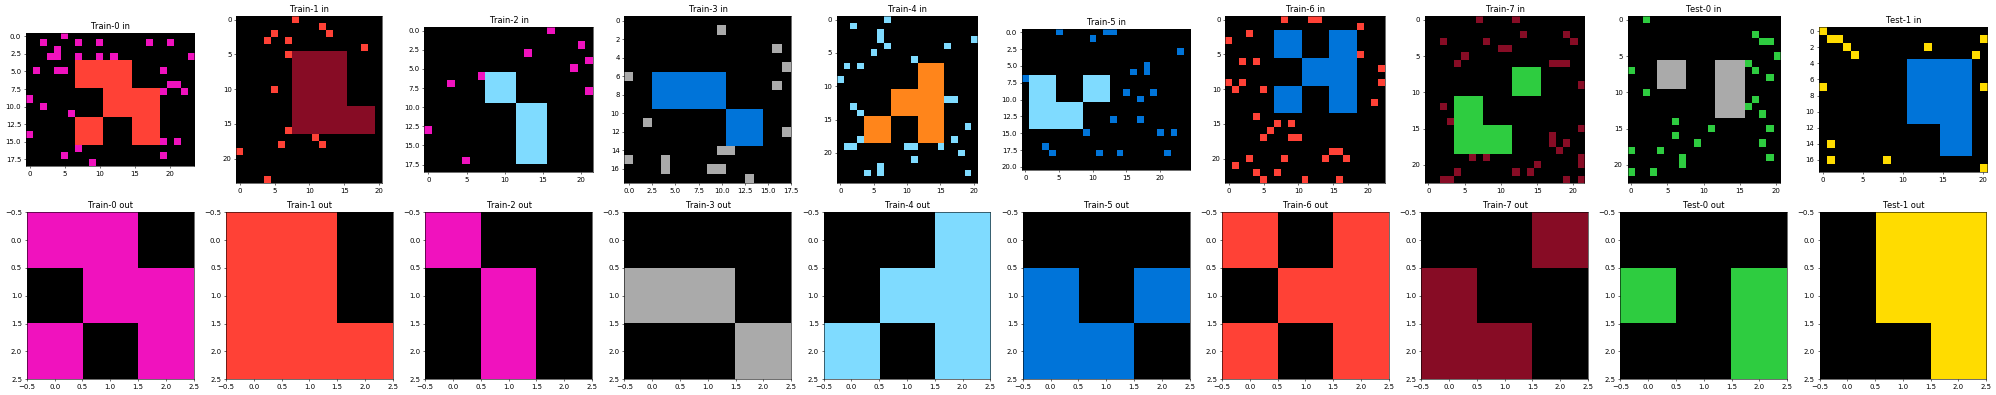

In [1118]:
task=task_builder_seven(8, 2)
plot_task(task)

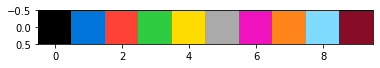

In [275]:
plt.imshow([list(range(0,10))],cmap)